In [1]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, array_to_latex
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector, Operator
import numpy as np

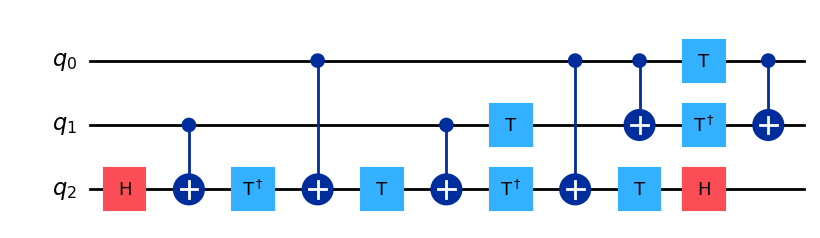

In [2]:
# Creamos el circuito del Ejercicio 1
qc = QuantumCircuit(3)
qc.h([2])
qc.cx([1], [2])
qc.tdg([2])
qc.cx([0], [2])
qc.t([2])
qc.cx([1], [2])
qc.t([1])
qc.tdg([2])
qc.cx([0], [2])
qc.cx([0], [1])
qc.t([2])
qc.h([2])
qc.tdg([1])
qc.t([0])
qc.cx([0], [1])

# Dibujamos el circuito
qc.draw('mpl')


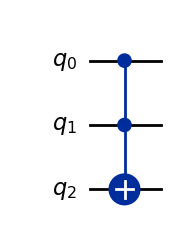

In [3]:
#Creamos un Toffoli
qctoffoli = QuantumCircuit(3)
qctoffoli.ccx(0,1,2)
#Dibujamos el circuito
qctoffoli.draw('mpl')

In [4]:
#Comparamos con StateVector para ver si ambos circuitos son equivalentes
are_equivalent = Statevector.from_instruction(qc).equiv(Statevector.from_instruction(qctoffoli))
print("Los circuitos son equivalentes:", are_equivalent)

Los circuitos son equivalentes: True


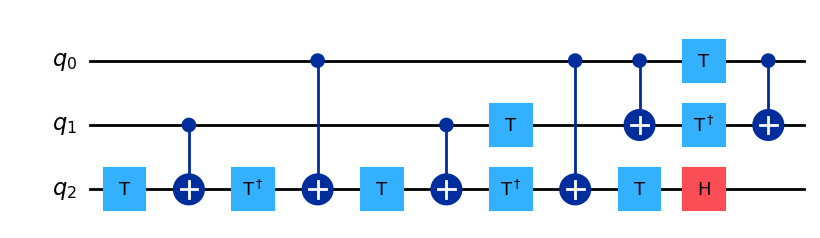

In [5]:
#Probamos a cambiar el primer circuito para comprobar que al alterar el circuito el resultado es False
qc2 = QuantumCircuit(3)
qc2.t([2]) #Cambiamos la primera hadamard por una puerta T
qc2.cx([1], [2])
qc2.tdg([2])
qc2.cx([0], [2])
qc2.t([2])
qc2.cx([1], [2])
qc2.t([1])
qc2.tdg([2])
qc2.cx([0], [2])
qc2.cx([0], [1])
qc2.t([2])
qc2.h([2])
qc2.tdg([1])
qc2.t([0])
qc2.cx([0], [1])

# Dibujamos el circuito
qc2.draw('mpl')


In [6]:
#Comparamos con StateVector para ver si ambos circuitos son equivalentes
are_equivalent2 = Statevector.from_instruction(qc2).equiv(Statevector.from_instruction(qctoffoli))
print("Los circuitos son equivalentes:", are_equivalent2)

Los circuitos son equivalentes: False


In [7]:
#Ploteamos la matriz del primer circuito
simulator = Aer.get_backend('unitary_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
unitary = result.get_unitary(qc)
qcmatrix=array_to_latex(unitary)
print("Matriz del circuito 1:")
qcmatrix


Matriz del circuito 1:


<IPython.core.display.Latex object>

In [8]:
#Ploteamos la matriz del primer circuito
simulator2 = Aer.get_backend('unitary_simulator')
compiled_circuit2 = transpile(qctoffoli, simulator2)
result = simulator2.run(compiled_circuit2).result()
unitary2 = result.get_unitary(qctoffoli)
qcmatrix2=array_to_latex(unitary2)
print("Matriz del circuito 2:")
qcmatrix2

Matriz del circuito 2:


<IPython.core.display.Latex object>

In [9]:
#Como podemos observar ambas matrices son iguales

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [11]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="d671be51d560e05abf1098cc4bcdec183ac0e59b27623b449ee64c534a087a7b3656f1da76271a8bba92b065e1e7b5896c40e5ea4ef02092e0f7973b02f5493e", overwrite=True)

In [12]:
service = QiskitRuntimeService()

backends = service.backends()
available_backends = [backend for backend in backends if backend.configuration().n_qubits >= 3 and backend.status().operational]
print("Available Backends:", available_backends)

Available Backends: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


In [13]:
backend_name = 'ibm_brisbane'  # Change this to other backends as needed
backend = service.backend(backend_name)

In [14]:
transpiled_circuit = transpile(qc, backend)
qobj = assemble(transpiled_circuit)

In [15]:
job = backend.run(transpiled_circuit)

IBMBackendApiError: 'Error submitting job: \'409 Client Error: Conflict for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"message":"You have reached the limit of 3 pending  jobs. Please wait for a job to complete or cancel one before submitting anything new.","code":3458,"solution":"Wait until some previous jobs were finished. You can cancel pending jobs to run new jobs.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''

In [ ]:
result = job.result()

In [ ]:
counts = result.get_counts()
plot_histogram(counts)
plt.show()